In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

datadir0  = '/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/Fig7sMutants/Data/'
plotsdir  = '//Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/Fig7sMutants/Plots/'

clrs = ["#1f78b4","#b2df8a","#33a02c"]

In [4]:

# Function to extract the first number after "Gaussian"
def extract_time_from_filename(fname):
    match = re.search(r'Gaussian(\d+)', fname)
    return int(match.group(1)) if match else None



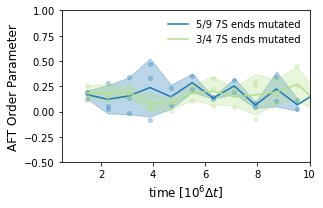

In [15]:
fs2 = 12
folderhandles = ['XStretch100_Fraction0.56/','XStretch100_Fraction0.75/']
fig,ax = plt.subplots(figsize = (4.5,3))
labels = ['5/9 7S ends mutated', '3/4 7S ends mutated']
seeds = "1 2 3".split()
for xx in range(len(folderhandles)):
    all_data = []
    for s in range(len(seeds)):
        datapath = datadir0+folderhandles[xx]+"median_order_parameterWtNames_seed"+seeds[s]+".csv"
        OPdata = pd.read_csv(datapath, header = 'infer')
        OrderParameter = OPdata['median_order_parameter']
        FileNames = OPdata['file_name']
        OPdata['time'] = FileNames.apply(extract_time_from_filename)
        Time = OPdata['time']
        all_data.append(OPdata[['time', 'median_order_parameter']])
        
        #if xx <2:
        Time = Time*2
        ax.plot(np.divide(np.add(Time,-0.4e7),1e6),OrderParameter,color=clrs[xx],alpha = 0.3,linestyle='',marker = 'o',markersize = 4)
        # else:
        #     ax.plot(Time,OrderParameter,color=clrs[xx],alpha = 0.3,linestyle='',marker = 'o',markersize = 4)
    # Combine and group
    combined = pd.concat(all_data)
    grouped = combined.groupby('time')['median_order_parameter']
    mean_OP = grouped.mean()
    std_OP = grouped.std()
    #if xx < 2:
    ax.plot(np.divide(np.add(np.multiply(mean_OP.index ,2),-0.4e7),1e6), mean_OP.values, color=clrs[xx], label=labels[xx])
    ax.fill_between(np.divide(np.add(np.multiply(mean_OP.index ,2),-0.4e7),1e6), mean_OP - std_OP, mean_OP + std_OP, color=clrs[xx], alpha=0.3)
# else:
#     ax.plot(mean_OP.index, mean_OP.values, color=clrs[xx], label=labels[xx])
#     ax.fill_between(mean_OP.index, mean_OP - std_OP, mean_OP + std_OP, color=clrs[xx], alpha=0.3)
ax.set_xlabel(r'time [$10^6\Delta t$]',fontsize =fs2)
ax.set_ylabel('AFT Order Parameter',fontsize =fs2)
#ax.set_title("Stretch 100%")
ax.set_ylim([-0.5,1.0])
ax.set_xlim([0.5,10])
ax.legend(frameon=False)
fig.tight_layout()
fig.savefig(plotsdir+'7sMutantAFT_OPVsTime.pdf')
fig.savefig(plotsdir+'7sMutantAFT_OPVsTime.png')

Fetching no stretch data

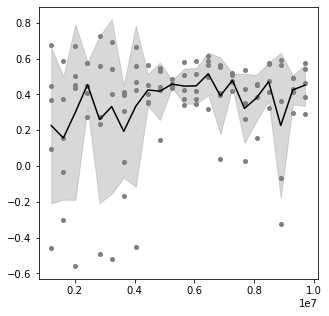

In [ ]:

# Plot

# folderhandle = 'Images_Stretch/den0.05_Xstretch'
# #seeds = "1 2 3".split()
# names = '0.85_F0.75_seed1 0.85_F0.75_seed2'.split()
# labels = ['Stretch 85%', 'Stretch 85%']
#all_data = []
# for s in range(2):

#     datapath00 = datadir0+folderhandle+seeds[s]+"/output/median_order_parameterWtNames.csv"
#     OPdata00 = pd.read_csv(datapath, header = 'infer')
#     OrderParameter = OPdata['median_order_parameter']
#     FileNames = OPdata['file_name']
#     OPdata00['time'] = FileNames.apply(extract_time_from_filename)

#     datapath = datadir0+folderhandle+names[s]+"/output/median_order_parameterWtNames.csv"
#     OPdata = pd.read_csv(datapath, header = 'infer')
#     OrderParameter = OPdata['median_order_parameter']
#     FileNames = OPdata['file_name']
#     OPdata['time'] = FileNames.apply(extract_time_from_filename)
#     Time = OPdata['time']


#     #all_data.append(OPdata[['time', 'median_order_parameter']])
#     Times1 = seed1_data['time']
#     OrderParameter1 = seed1_data['median_order_parameter']
#     indexEnd = np.argmin(np.abs(Times1 -Time[0]))
#     # Stritch Time1 and Time togehter
#     Times1 = Times1[:indexEnd]
#     OrderParameter1 = OrderParameter1[:indexEnd]
#     TimeTot = np.concatenate((Times1, Time))
#     OrderParameterTot = np.concatenate((OrderParameter1, OrderParameter))
#     all_OP.append(OrderParameterTot)
#     all_times.append(TimeTot)

#     #ax.plot(Times1[:indexEnd], OrderParameter1[:indexEnd], color=clrs[s], label='No stretch', linestyle=':')
#     ax.plot(TimeTot,OrderParameterTot,color=clrs[s],label=labels[s],linestyle='-',marker = 'o',markersize = 4)
# # Combine and group
# combined = pd.concat(all_data)
# grouped = combined.groupby('time')['median_order_parameter']
# mean_OP = grouped.mean()
# std_OP = grouped.std()
# all_data=[]
# for s in range(2):
#     # Part 1: Early file
#     datapath00 = datadir0 + folderhandle1 + seeds[s] + "/output/median_order_parameterWtNames.csv"
#     OPdata00 = pd.read_csv(datapath00, header='infer')
#     OPdata00['time'] = OPdata00['file_name'].apply(extract_time_from_filename)

#     # Part 2: Later file
#     datapath = datadir0+folderhandle+names[s]+"/output/median_order_parameterWtNames.csv"
#     OPdata = pd.read_csv(datapath, header='infer')
#     OPdata['time'] = OPdata['file_name'].apply(extract_time_from_filename)

#     # Determine cutoff index in OPdata00 to avoid overlapping with OPdata
#     indexEnd = np.argmin(np.abs(OPdata00['time'].values - OPdata['time'].iloc[0]))

#     # Stitch the time and OP arrays
#     time_total = np.concatenate([OPdata00['time'].values[:indexEnd], OPdata['time'].values])
#     OP_total = np.concatenate([OPdata00['median_order_parameter'].values[:indexEnd], OPdata['median_order_parameter'].values])

#     # Store as DataFrame for grouping
#     df_seed = pd.DataFrame({'time': time_total, 'median_order_parameter': OP_total})
#     all_data.append(df_seed)

#     # Optional plot for each seed
#     ax.plot(time_total, OP_total, color=clrs[s+1], label=labels[s], linestyle='', marker='o', markersize=4)

# # Combine and group across all seeds
# combined = pd.concat(all_data)
# grouped = combined.groupby('time')['median_order_parameter']
# mean_OP = grouped.mean()
# std_OP = grouped.std()

# # Plot
# ax.plot(mean_OP.index, mean_OP.values, color=clrs[0], label='No stretch')
# ax.fill_between(mean_OP.index, mean_OP - std_OP, mean_OP + std_OP, color=clrs[0], alpha=0.3)
# #ax.plot(mean_OP.index, mean_OP.values, color='black', label='Mean', marker='o')
# #ax.fill_between(mean_OP.index, mean_OP - std_OP, mean_OP + std_OP, color='gray', alpha=0.3, label='±1 STD')
# ax.set_xlabel(r'Time [$\Delta t$]',fontsize=12)
# ax.set_ylabel('Median Order Parameter',fontsize=12)
# ax.set_title(' Window size 50, overlap 50%, neighbourhood 5',fontsize=12)
# ax.legend(frameon=False)
# ax.set_ylim([-0.5,0.8])

# ax.plot(mean_OP.index, mean_OP.values, color='black', label='Mean', marker='o')
# ax.fill_between(mean_OP.index, mean_OP - std_OP, mean_OP + std_OP, color='gray', alpha=0.3, label='±1 STD')
# ax.set_ylim([-0.5, 0.5])
# ax.set_xlabel('Time')
# ax.set_ylabel('Order Parameter')
# ax.set_title('No Stretch, Window size 50, overlap 50%, neighbourhood 5')
# ax.legend()
# ax.set_ylim([-0.5,0.5])

(-0.5, 0.8)

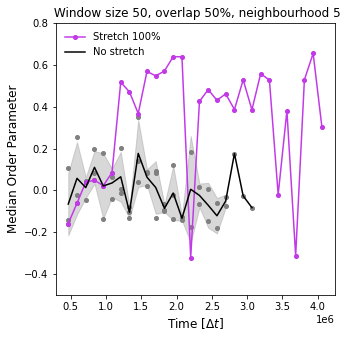

In [5]:
folderhandle = 'Images_NoStretch/NoStretch_dens0.05_seed'
seeds = "1 2 3".split()
all_data = []
fig,ax = plt.subplots(figsize = (5,5))
for s in range(len(seeds)):
    datapath = datadir0+folderhandle+seeds[s]+"/output/median_order_parameterWtNames.csv"
    OPdata = pd.read_csv(datapath, header = 'infer')
    OrderParameter = OPdata['median_order_parameter']
    FileNames = OPdata['file_name']
    OPdata['time'] = FileNames.apply(extract_time_from_filename)
    Time = OPdata['time']
    all_data.append(OPdata[['time', 'median_order_parameter']])
    if s==0:
        seed1_data = OPdata

    ax.plot(Time,OrderParameter,color='grey',linestyle='',marker = 'o',markersize = 4)
# Combine and group
combined = pd.concat(all_data)
grouped = combined.groupby('time')['median_order_parameter']
mean_OP = grouped.mean()
std_OP = grouped.std()

# Plot

folderhandle = 'Images_Stretch/den0.05_Xstretch'
#seeds = "1 2 3".split()
names = '1._F0.75 0.85_F0.75_seed1 0.85_F0.75_seed2 1.5_F0.75'.split()
labels = ['Stretch 100%', 'Stretch 85%', 'Stretch 85%', 'Stretch 1.5']
all_data = []
for s in range(1):
    datapath = datadir0+folderhandle+names[s]+"/output/median_order_parameterWtNames.csv"
    OPdata = pd.read_csv(datapath, header = 'infer')
    OrderParameter = OPdata['median_order_parameter']
    FileNames = OPdata['file_name']
    OPdata['time'] = FileNames.apply(extract_time_from_filename)
    Time = OPdata['time']
    all_data.append(OPdata[['time', 'median_order_parameter']])
    Times1 = seed1_data['time']
    OrderParameter1 = seed1_data['median_order_parameter']
    indexEnd = np.argmin(np.abs(Times1 -Time[0]))
    # Stritch Time1 and Time togehter
    Times1 = Times1[:indexEnd]
    OrderParameter1 = OrderParameter1[:indexEnd]
    TimeTot = np.concatenate((Times1, Time))
    OrderParameterTot = np.concatenate((OrderParameter1, OrderParameter))
    #ax.plot(Times1[:indexEnd], OrderParameter1[:indexEnd], color=clrs[s], label='No stretch', linestyle=':')
    ax.plot(TimeTot,OrderParameterTot,color=clrs[s],label=labels[s],linestyle='-',marker = 'o',markersize = 4)
# Combine and group
combined = pd.concat(all_data)
grouped = combined.groupby('time')['median_order_parameter']
# mean_OP = grouped.mean()
# std_OP = grouped.std()

# Plot
ax.plot(mean_OP.index, mean_OP.values, color='black', label='No stretch')
ax.fill_between(mean_OP.index, mean_OP - std_OP, mean_OP + std_OP, color='gray', alpha=0.3)
#ax.plot(mean_OP.index, mean_OP.values, color='black', label='Mean', marker='o')
#ax.fill_between(mean_OP.index, mean_OP - std_OP, mean_OP + std_OP, color='gray', alpha=0.3, label='±1 STD')
ax.set_xlabel(r'Time [$\Delta t$]',fontsize=12)
ax.set_ylabel('Median Order Parameter',fontsize=12)
ax.set_title(' Window size 50, overlap 50%, neighbourhood 5',fontsize=12)
ax.legend(frameon=False)
ax.set_ylim([-0.5,0.8])

# ax.plot(mean_OP.index, mean_OP.values, color='black', label='Mean', marker='o')
# ax.fill_between(mean_OP.index, mean_OP - std_OP, mean_OP + std_OP, color='gray', alpha=0.3, label='±1 STD')
# ax.set_ylim([-0.5, 0.5])
# ax.set_xlabel('Time')
# ax.set_ylabel('Order Parameter')
# ax.set_title('No Stretch, Window size 50, overlap 50%, neighbourhood 5')
# ax.legend()
# ax.set_ylim([-0.5,0.5])

Getting some data for stretched networks